# Word Embeddings with word2vec, fastText and GloVe

In [1]:
!pip install gensim

In [2]:
%matplotlib inline

import os
import urllib.request
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

#### Q: Name two advantages of using dense parametrised word representations compared to one-hot vectors

#### A: Give your answer here

1) We can define a similarity measure between different words, for example using the cosine of the scalar product (which would be zero for the one-hot encoding since all vectors are orthogonal)

2) Can try to embedd in lower-dimensional space (do not need a separate dimension for each word) 

## Play around with pre-trained Word2Vec

In [3]:
#convenience function for plotting embeddings into 2-dimensional space

def plot_word_embeddings(model, search_list):
    words = []
    for term in search_list:
        words += [w[0] for w in model.wv.most_similar([term], topn=6)]                                   
    words += search_list
    words = list(dict.fromkeys(words)) # remove duplicates

    vectors = model.wv[words]
    
    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=7)
    T = tsne.fit_transform(vectors)

    plt.figure(figsize=(16, 10))
    plt.scatter(T[:, 0], T[:, 1])
    for label, x, y in zip(words, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+2, y+2), xytext=(0, 0), textcoords='offset points')

In [4]:
import gensim.downloader as api

corpus = api.load('text8')
api.info("text8")

{'num_records': 1701,
 'record_format': 'list of str (tokens)',
 'file_size': 33182058,
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/text8/__init__.py',
 'license': 'not found',
 'description': 'First 100,000,000 bytes of plain text from Wikipedia. Used for testing purposes; see wiki-english-* for proper full Wikipedia datasets.',
 'checksum': '68799af40b6bda07dfa47a32612e5364',
 'file_name': 'text8.gz',
 'read_more': ['http://mattmahoney.net/dc/textdata.html'],
 'parts': 1}

In [6]:
from gensim.models.word2vec import Word2Vec

print("Training model on corpus ...")

# Documentation:
# https://radimrehurek.com/gensim/models/word2vec.html
# sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.
w2v_trained = Word2Vec(corpus, vector_size=100, window=5, min_count=1, sg=0, workers=4)

print("Finished training.")

Training model on corpus ...
Finished training.


In [8]:
# Check the number of embedded words and their embedding size
w2v_trained.wv.vectors.shape

(253854, 100)

In [10]:
# Get the vector to a word
queen_vec = w2v_trained.wv['queen']

print(queen_vec)
print('queen_vec.shape is', queen_vec.shape)

[-2.503998   -1.0762359   2.0096653  -1.4107126   1.6920872   1.9656485
 -0.40084386  3.728022   -1.938102   -0.3224284  -0.63607043 -2.514667
  0.8920524   1.7722608  -1.8970596  -2.129993    0.9414744  -0.14224444
 -0.74487656 -2.543381   -0.7630517   1.146288   -2.5696552  -1.3838942
  0.35299698  1.2499552   1.014935    1.3150206  -0.7191102  -2.3386006
 -0.56097686 -0.4118629  -0.6506522   1.2293037   1.7199833  -0.763821
  1.9963359  -2.6263392  -2.813021    0.5886081   1.1923811   0.44690043
 -1.9324498  -0.5002427  -2.5768054  -2.9717162  -0.70226777 -0.20196627
  0.2418624   0.07033401  3.7145276   0.24674283 -2.813806    2.7252872
  0.09581621 -0.2996935   0.98629564  1.0760219  -0.33357987 -3.4596004
 -0.6158229  -1.1682436   2.7736928  -1.9945807  -2.634128   -0.37424606
 -2.375186   -2.952631    0.5348708  -1.078055    0.649239   -0.64314723
 -0.7683042  -1.7180421   0.8966778  -0.4332239   1.0117508  -0.05566332
 -0.6431061   1.0400877  -0.50110215 -1.1284434   2.3282688 

In [11]:
w2v_trained.wv['king']

array([-1.3200872 , -1.199096  ,  1.6383283 ,  0.7086772 ,  0.33072808,
        3.1822171 ,  0.05445672,  4.1260223 , -1.8862771 ,  1.5206401 ,
       -0.6527298 , -2.4446716 ,  0.173259  ,  2.840488  , -1.3655288 ,
       -3.0834198 ,  0.49325332,  0.12201515,  2.9701984 , -2.9621115 ,
        1.349327  ,  1.6973311 , -2.6117115 , -0.06939457,  0.9502493 ,
        0.55782706,  0.73134005,  2.5534713 ,  1.2808619 , -0.39346886,
       -0.785501  , -0.89743596, -0.71086156,  0.18913521,  1.0428326 ,
        1.1873785 ,  0.95253146, -0.66242117,  0.57079166, -0.4813458 ,
        0.22540875, -0.2781379 , -1.1928288 ,  0.22327168, -4.053267  ,
       -0.76896685, -1.556822  ,  0.14309734,  0.805131  , -2.4811275 ,
        4.4315906 ,  1.439839  , -3.884041  ,  3.7020686 , -0.7135231 ,
       -1.2670193 ,  0.48613805,  0.6423367 ,  0.48217553, -4.1613746 ,
        1.7968712 ,  1.7650937 ,  1.0479735 , -1.3203312 , -0.4472963 ,
       -1.9863123 , -1.0492373 , -2.2893817 ,  0.93396634, -2.19

We can use the cosine-smililarity metric to compare different embeddings. 

In [12]:
w2v_trained.wv.similarity('queen', 'king')

0.7221555

or even find the most similar words to a given word

In [13]:
w2v_trained.wv.most_similar('queen')

[('elizabeth', 0.7940473556518555),
 ('princess', 0.7606390714645386),
 ('prince', 0.7304962873458862),
 ('king', 0.7221555113792419),
 ('consort', 0.6837749481201172),
 ('mary', 0.6781771183013916),
 ('lord', 0.6658295392990112),
 ('crown', 0.6594182252883911),
 ('duchess', 0.6522725820541382),
 ('regent', 0.6452118158340454)]

/opt/homebrew/Caskroom/miniforge/base/envs/2022-02-10_rosetta_py3.8_new/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/homebrew/Caskroom/miniforge/base/envs/2022-02-10_rosetta_py3.8_new/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


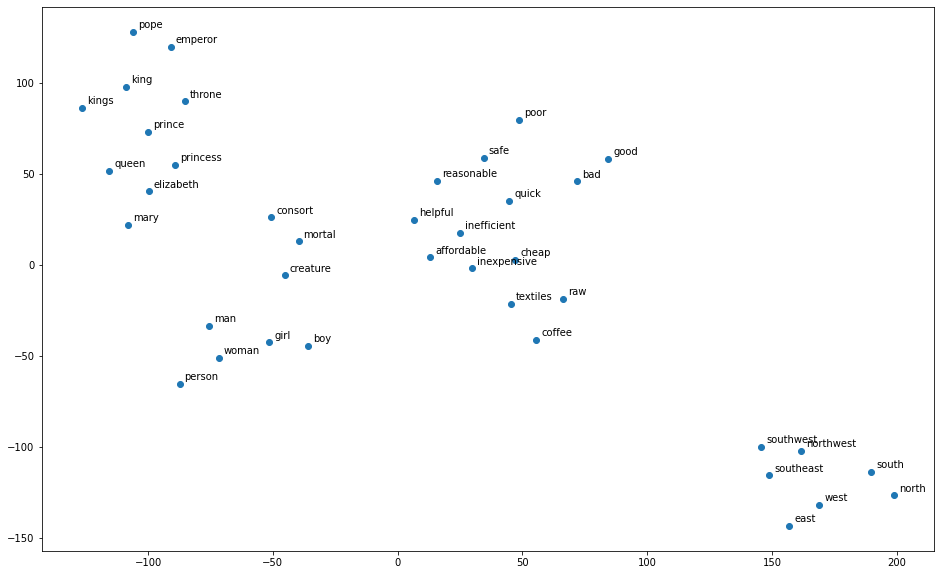

In [14]:
#plot to see clustering
search_list = ['queen', 'king', 'man', 'cheap', 'west', 'good']
plot_word_embeddings(w2v_trained, search_list)

#### Find interesting relationships between words: A is to B as C is to ? 
(Take a look into the lecture slides if you don't know)

B - A + C

In [15]:
B = 'king'
A = 'man'
C = 'woman'

w2v_trained.wv.most_similar(positive=[B, C], negative=[A])

[('queen', 0.682550311088562),
 ('prince', 0.6550226211547852),
 ('throne', 0.6404703855514526),
 ('empress', 0.64030522108078),
 ('princess', 0.6303505897521973),
 ('emperor', 0.6303259134292603),
 ('son', 0.6257210373878479),
 ('dowager', 0.6209217309951782),
 ('daughter', 0.6184619665145874),
 ('isabella', 0.612530529499054)]

In [16]:
B = 'brother'
A = 'man'
C = 'woman'

w2v_trained.wv.most_similar(positive=[B, C], negative=[A])

[('wife', 0.8292927145957947),
 ('sister', 0.8078106641769409),
 ('daughter', 0.8076819777488708),
 ('grandmother', 0.7587373852729797),
 ('husband', 0.7538291811943054),
 ('mother', 0.7444733381271362),
 ('cousin', 0.7426989078521729),
 ('daughters', 0.7370845079421997),
 ('aunt', 0.7365167737007141),
 ('widow', 0.7343751788139343)]

In [17]:
B = 'france'
A = 'paris'
C = 'germany'

w2v_trained.wv.most_similar(positive=[B, C], negative=[A])

[('russia', 0.7219794988632202),
 ('finland', 0.7082592844963074),
 ('hungary', 0.7072414755821228),
 ('austria', 0.6997374892234802),
 ('poland', 0.6633777022361755),
 ('lithuania', 0.6565443277359009),
 ('moldova', 0.643229603767395),
 ('libya', 0.6346868276596069),
 ('albania', 0.6281164884567261),
 ('macedonia', 0.6238536834716797)]

We can naively compare sentences by adding up all word embeddings of the respective sentences and diving by the length

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from copy import deepcopy

#TODO: Generalize the similarity function to be able to compare sentences using cosine-similarity

def sentence_similarity(embeddings, sentence1, sentence2):
    # TODO: Your code here
    return

In [ ]:
print(sentence_similarity(w2v_trained.wv, 'apple is more tasty than orange', 'fruit'))
print(sentence_similarity(w2v_trained.wv, 'apple is more tasty than orange', 'computer'))

## fastText

#### A big issue of Word2Vec is the fixed vocabulary size, an alternative solution is provided by fastText

In [24]:
# not in the vocabulary
try:
    w2v_trained.wv['kingg']
except:
    print("Error: This word is not in the vocabulary!")

Error: This word is not in the vocabulary!


In [28]:
from gensim.models.fasttext import FastText

#Train your FastText model using the FastText method
trained_ft = FastText(corpus, vector_size=100, window=5, min_count=1, epochs=1)

In [29]:
# Sanity check if trained word-embeddings capture similarities as before
print(trained_ft.wv.most_similar('west'))
print(trained_ft.wv.most_similar('king'))

[('westcoast', 0.9777399897575378), ('southwest', 0.964011549949646), ('northwest', 0.9586482644081116), ('midwest', 0.9560104012489319), ('qwest', 0.9540138244628906), ('westbf', 0.9534851312637329), ('southsouthwest', 0.9531679749488831), ('westf', 0.9523372054100037), ('skywest', 0.9520193934440613), ('westfahl', 0.9498797655105591)]
[('franking', 0.9140173196792603), ('chungking', 0.9020286202430725), ('kinghood', 0.9008721113204956), ('kinneging', 0.8887897729873657), ('franksgiving', 0.8798620104789734), ('kingswear', 0.8765120506286621), ('kingpin', 0.8761264681816101), ('vingt', 0.8753322958946228), ('kingcon', 0.8743012547492981), ('kingair', 0.8742717504501343)]


/opt/homebrew/Caskroom/miniforge/base/envs/2022-02-10_rosetta_py3.8_new/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/homebrew/Caskroom/miniforge/base/envs/2022-02-10_rosetta_py3.8_new/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


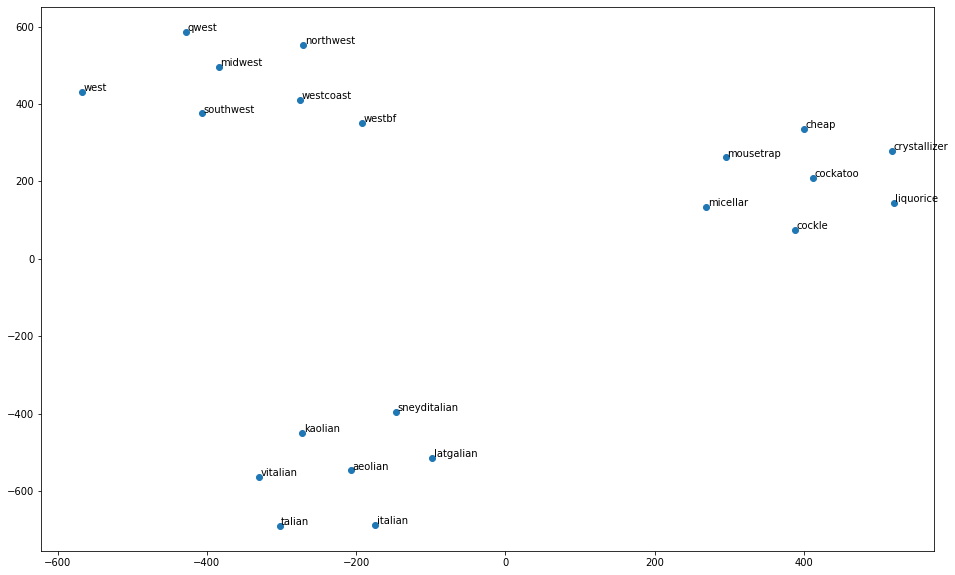

In [30]:
search_list = ['cheap', 'west', 'italian']
plot_word_embeddings(trained_ft, search_list)

In [31]:
# FastText lets us do comparisons for words outside of the vocabulary in contrast to Word2Vec
trained_ft.wv.most_similar('kingg')

[('kingu', 0.9802697896957397),
 ('kingpin', 0.9707815051078796),
 ('kingissepp', 0.9666116237640381),
 ('kingdavid', 0.9563149809837341),
 ('kinghorn', 0.9546626210212708),
 ('kingstie', 0.9478106498718262),
 ('kinginrin', 0.9455602765083313),
 ('kingwana', 0.9426518678665161),
 ('kingasveitin', 0.9423435926437378),
 ('kingair', 0.9401203393936157)]

In [34]:
trained_ft.wv.most_similar('expensif')

[('expendable', 0.9504278898239136),
 ('expensive', 0.9450192451477051),
 ('expendible', 0.9442025423049927),
 ('expense', 0.9437112212181091),
 ('expensa', 0.9431797862052917),
 ('unmeasurable', 0.9413573741912842),
 ('immeasurable', 0.9346290826797485),
 ('rateable', 0.932945728302002),
 ('unpenetrable', 0.9319725632667542),
 ('exchangeable', 0.9263240098953247)]

## GloVe

In [7]:
# TODO